# TAPEX fine-tuned on QATCH synthetic data generated from proprietary tables from Kaggle in different domains (finance, miscellaneous, e-commerce, medicine), for now just medicine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
from scipy.interpolate import PchipInterpolator



# Function to create a smooth curve using Pchip
def smooth_curve(x, y):
    pchip_interp = PchipInterpolator(x, y)
    x_smooth = np.linspace(x.min(), x.max(), 500)
    y_smooth = pchip_interp(x_smooth)
    return x_smooth, y_smooth

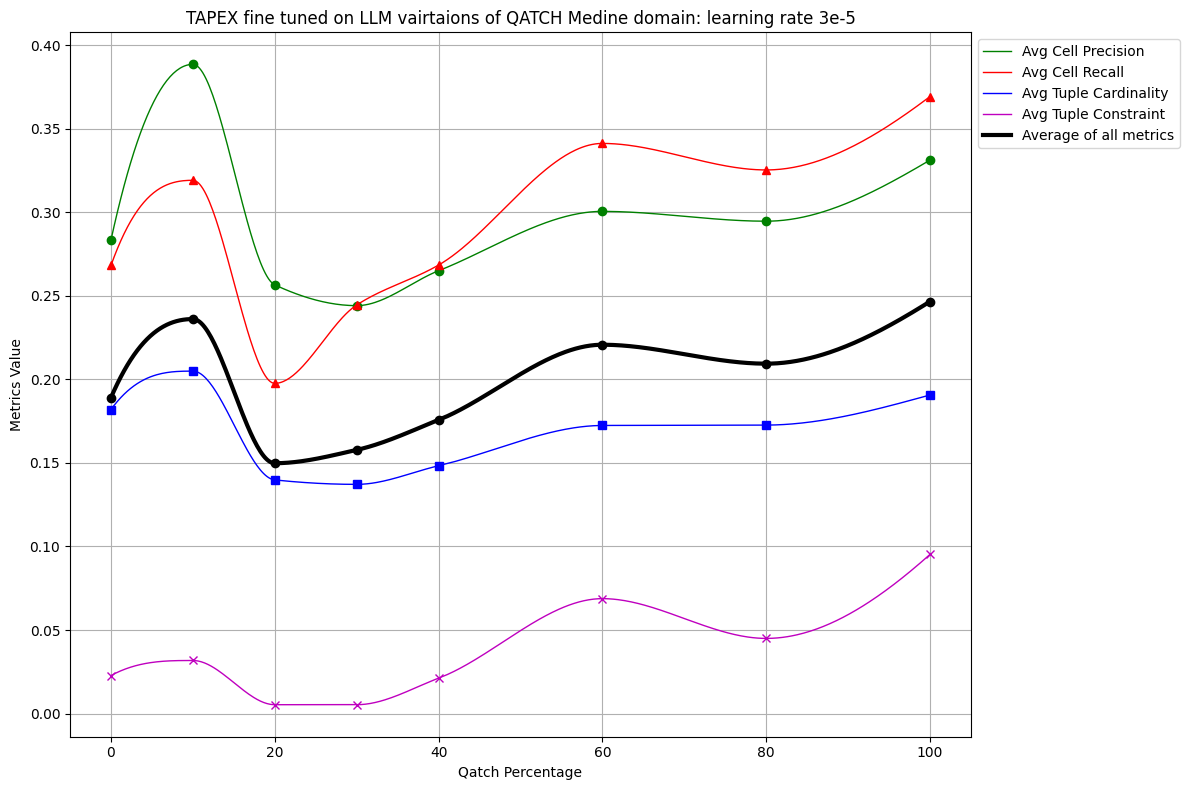

In [ ]:
#@title test_stats_df_medicine_{}prct_LLM_var
base_path = '/content/drive/MyDrive/TAPEX_Ressources/Results/'
filename_pattern = 'test_stats_df_medicine_{}prct_LLM_var.csv'
percentages = [0,10, 30,20,40, 60, 80, 100]

medicine_llm_var_lowLR = pd.DataFrame()
first_file_structure = None
combined_df = pd.DataFrame()
first_file_structure = None

for pct in percentages:
    # if pct == 0:
    #     file_path = os.path.join(base_path, 'stats_model_spiderMineTest.csv')
    # else:
    file_path = os.path.join(base_path, filename_pattern.format(pct))
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    current_df = pd.read_csv(file_path)
    current_df['qatch_percentage'] = pct
    if first_file_structure is None:
        first_file_structure = current_df.columns.tolist()
    else:
        if current_df.columns.tolist() != first_file_structure:
            print(f"File structure mismatch, skipping file: {file_path}")
            continue
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)

medicine_llm_var_lowLR=combined_df.copy()
columns_for_mean = ['general_avg_cell_precision', 'general_avg_cell_recall', 'general_avg_tuple_cardinality', 'general_avg_tuple_constraint']
medicine_llm_var_lowLR['general_avg_mean'] = medicine_llm_var_lowLR[columns_for_mean].mean(axis=1)



plt.figure(figsize=(12, 8))

# Ensure your data is sorted by 'qatch_percentage'
medicine_llm_var_lowLR = medicine_llm_var_lowLR.sort_values('qatch_percentage')
medicine_llm_var_lowLR_Low_Lr=medicine_llm_var_lowLR.copy()

# TEST data
x_smooth, y_smooth = smooth_curve(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_cell_precision'])
plt.plot(x_smooth, y_smooth, 'g-', label='Avg Cell Precision', lw=1)
plt.plot(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_cell_precision'], 'go')

x_smooth, y_smooth = smooth_curve(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_cell_recall'])
plt.plot(x_smooth, y_smooth, 'r-', label='Avg Cell Recall', lw=1)
plt.plot(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_cell_recall'], 'r^')

x_smooth, y_smooth = smooth_curve(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_tuple_cardinality'])
plt.plot(x_smooth, y_smooth, 'b-', label='Avg Tuple Cardinality', lw=1)
plt.plot(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_tuple_cardinality'], 'bs')

x_smooth, y_smooth = smooth_curve(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_tuple_constraint'])
plt.plot(x_smooth, y_smooth, 'm-', label='Avg Tuple Constraint', lw=1)
plt.plot(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_tuple_constraint'], 'mx')

# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'k-', label='Average of all metrics', lw=3)  # Increase line width for emphasis
plt.plot(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_mean'], 'ko')



plt.title('TAPEX fine tuned on LLM vairtaions of QATCH Medine domain: learning rate 3e-5')
plt.xlabel('Qatch Percentage')
plt.ylabel('Metrics Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

File not found: /content/drive/MyDrive/TAPEX_Ressources/Results/spiderDev_30prct_LLMvar.csv


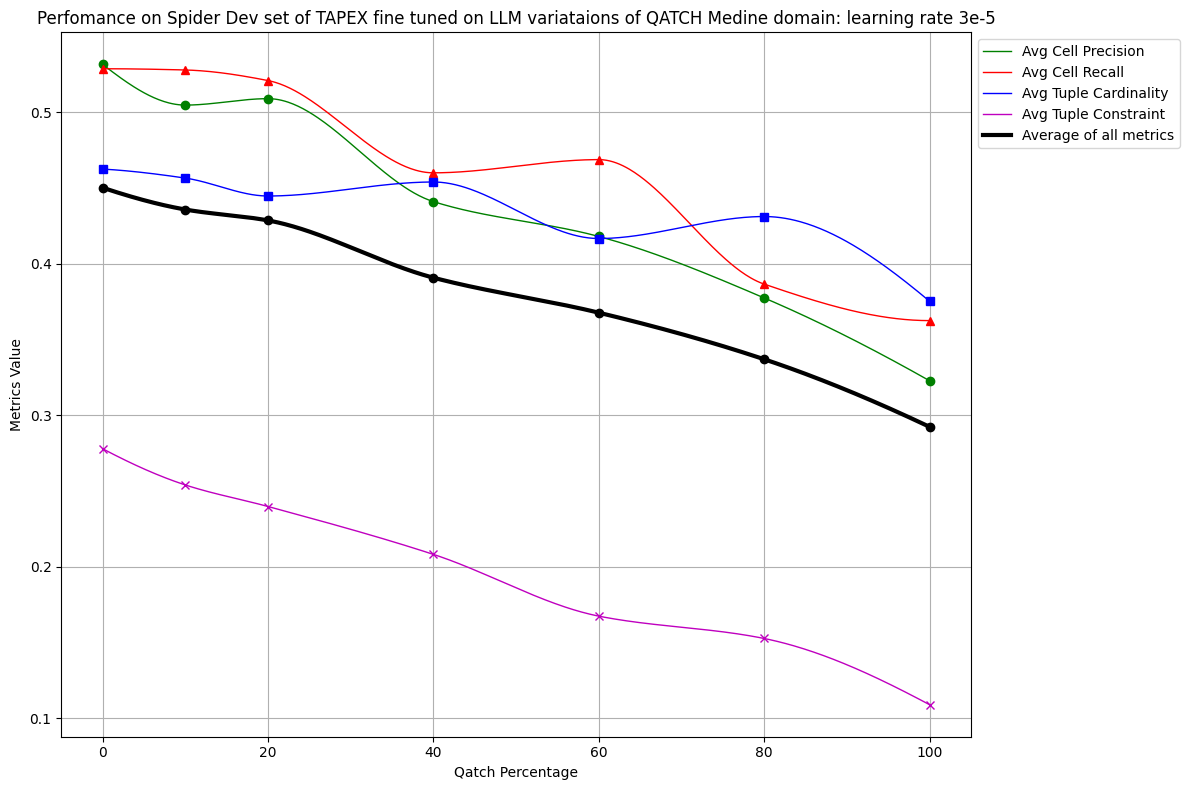

In [ ]:
#@title spiderDev_{}prct_LLMvar
base_path = '/content/drive/MyDrive/TAPEX_Ressources/Results/'
filename_pattern = 'spiderDev_{}prct_LLMvar.csv'
percentages = [0,10, 30,20,40, 60, 80, 100]

spiderDev_LLM_var_lowLR = pd.DataFrame()
first_file_structure = None
combined_df = pd.DataFrame()
first_file_structure = None

for pct in percentages:
    # if pct == 0:
    #     file_path = os.path.join(base_path, 'stats_model_spiderMineTest.csv')
    # else:
    file_path = os.path.join(base_path, filename_pattern.format(pct))
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    current_df = pd.read_csv(file_path)
    current_df['qatch_percentage'] = pct
    if first_file_structure is None:
        first_file_structure = current_df.columns.tolist()
    else:
        if current_df.columns.tolist() != first_file_structure:
            print(f"File structure mismatch, skipping file: {file_path}")
            continue
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)

spiderDev_LLM_var_lowLR=combined_df.copy()
columns_for_mean = ['general_avg_cell_precision', 'general_avg_cell_recall', 'general_avg_tuple_cardinality', 'general_avg_tuple_constraint']
spiderDev_LLM_var_lowLR['general_avg_mean'] = spiderDev_LLM_var_lowLR[columns_for_mean].mean(axis=1)



plt.figure(figsize=(12, 8))

# Ensure your data is sorted by 'qatch_percentage'
spiderDev_LLM_var_lowLR = spiderDev_LLM_var_lowLR.sort_values('qatch_percentage')
spiderDev_LLM_var_lowLR_Low_Lr=spiderDev_LLM_var_lowLR.copy()

# TEST data
x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_cell_precision'])
plt.plot(x_smooth, y_smooth, 'g-', label='Avg Cell Precision', lw=1)
plt.plot(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_cell_precision'], 'go')

x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_cell_recall'])
plt.plot(x_smooth, y_smooth, 'r-', label='Avg Cell Recall', lw=1)
plt.plot(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_cell_recall'], 'r^')

x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_tuple_cardinality'])
plt.plot(x_smooth, y_smooth, 'b-', label='Avg Tuple Cardinality', lw=1)
plt.plot(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_tuple_cardinality'], 'bs')

x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_tuple_constraint'])
plt.plot(x_smooth, y_smooth, 'm-', label='Avg Tuple Constraint', lw=1)
plt.plot(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_tuple_constraint'], 'mx')

# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'k-', label='Average of all metrics', lw=3)  # Increase line width for emphasis
plt.plot(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_mean'], 'ko')



plt.title('Perfomance on Spider Dev set of TAPEX fine tuned on LLM variataions of QATCH Medine domain: learning rate 3e-5')
plt.xlabel('Qatch Percentage')
plt.ylabel('Metrics Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

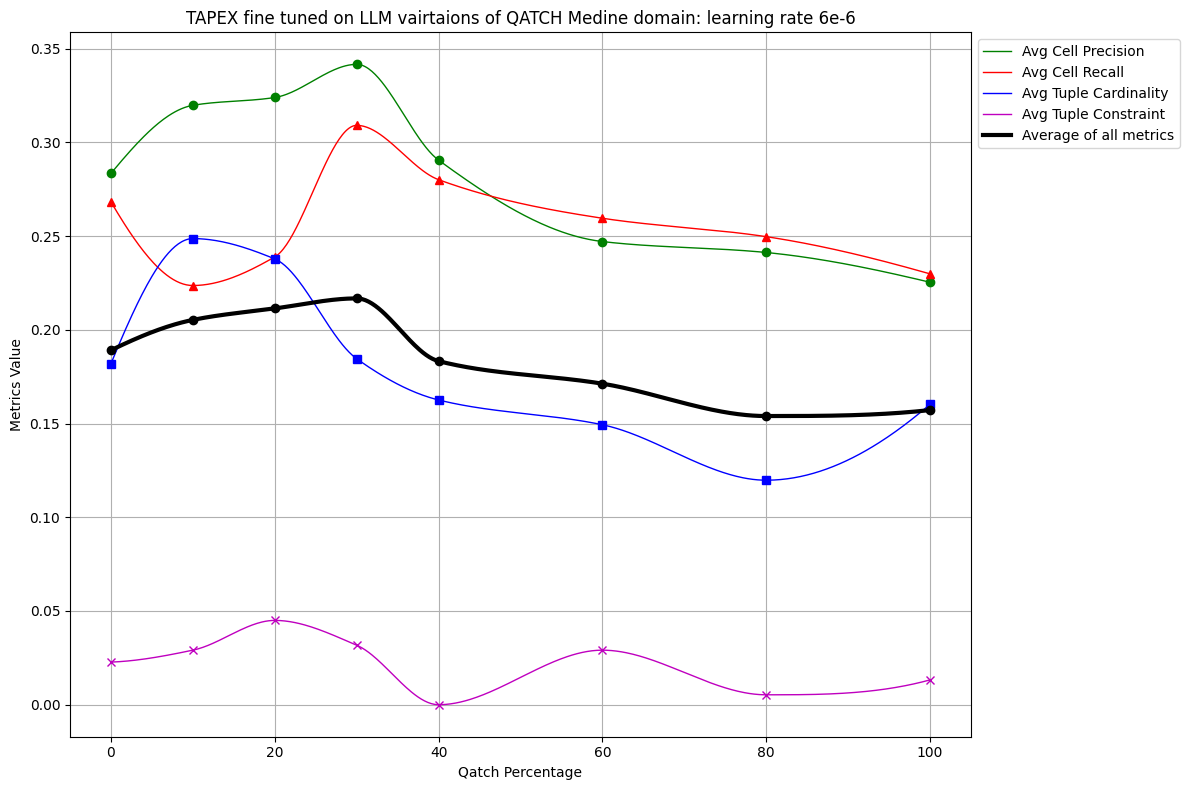

In [ ]:
#@title test_stats_df_medicine_{}prct_LLM_var_lowerLR
base_path = '/content/drive/MyDrive/TAPEX_Ressources/Results/'
filename_pattern = 'test_stats_df_medicine_{}prct_LLM_var_lowerLR.csv'
percentages = [0,10, 30,20,40, 60, 80, 100]

medicine_llm_var_LowerLR = pd.DataFrame()
first_file_structure = None
combined_df = pd.DataFrame()
first_file_structure = None

for pct in percentages:
    # if pct == 0:
    #     file_path = os.path.join(base_path, 'stats_model_spiderMineTest.csv')
    # else:
    file_path = os.path.join(base_path, filename_pattern.format(pct))
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    current_df = pd.read_csv(file_path)
    current_df['qatch_percentage'] = pct
    if first_file_structure is None:
        first_file_structure = current_df.columns.tolist()
    else:
        if current_df.columns.tolist() != first_file_structure:
            print(f"File structure mismatch, skipping file: {file_path}")
            continue
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)

medicine_llm_var_LowerLR=combined_df.copy()
columns_for_mean = ['general_avg_cell_precision', 'general_avg_cell_recall', 'general_avg_tuple_cardinality', 'general_avg_tuple_constraint']
medicine_llm_var_LowerLR['general_avg_mean'] = medicine_llm_var_LowerLR[columns_for_mean].mean(axis=1)



plt.figure(figsize=(12, 8))

# Ensure your data is sorted by 'qatch_percentage'
medicine_llm_var_LowerLR = medicine_llm_var_LowerLR.sort_values('qatch_percentage')
medicine_llm_var_LowerLR_Low_Lr=medicine_llm_var_LowerLR.copy()

# TEST data
x_smooth, y_smooth = smooth_curve(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_cell_precision'])
plt.plot(x_smooth, y_smooth, 'g-', label='Avg Cell Precision', lw=1)
plt.plot(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_cell_precision'], 'go')

x_smooth, y_smooth = smooth_curve(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_cell_recall'])
plt.plot(x_smooth, y_smooth, 'r-', label='Avg Cell Recall', lw=1)
plt.plot(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_cell_recall'], 'r^')

x_smooth, y_smooth = smooth_curve(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_tuple_cardinality'])
plt.plot(x_smooth, y_smooth, 'b-', label='Avg Tuple Cardinality', lw=1)
plt.plot(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_tuple_cardinality'], 'bs')

x_smooth, y_smooth = smooth_curve(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_tuple_constraint'])
plt.plot(x_smooth, y_smooth, 'm-', label='Avg Tuple Constraint', lw=1)
plt.plot(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_tuple_constraint'], 'mx')

# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'k-', label='Average of all metrics', lw=3)  # Increase line width for emphasis
plt.plot(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_mean'], 'ko')



plt.title('TAPEX fine tuned on LLM vairtaions of QATCH Medine domain: learning rate 6e-6')
plt.xlabel('Qatch Percentage')
plt.ylabel('Metrics Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

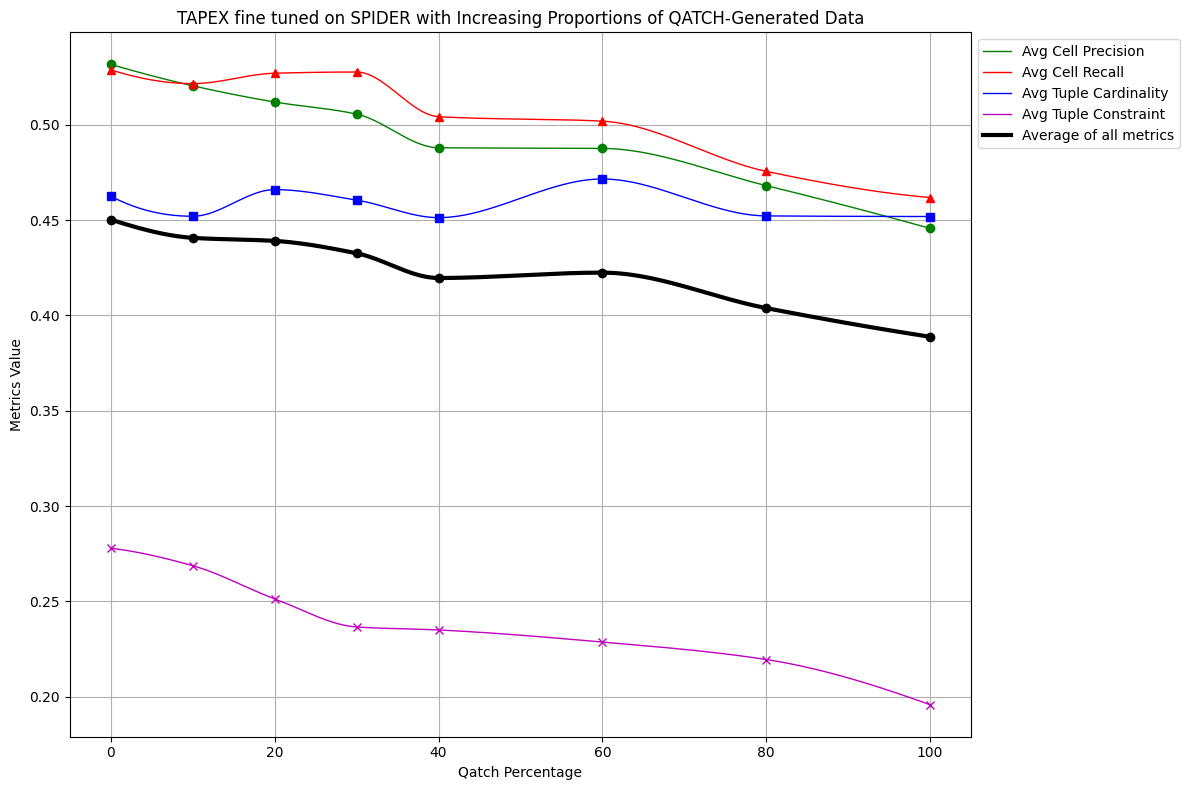

In [ ]:
#@title spiderDev_{}prct_LLMvar_lowerLR
base_path = '/content/drive/MyDrive/TAPEX_Ressources/Results/'
filename_pattern = 'spiderDev_{}prct_LLMvar_lowerLR.csv'
percentages = [0,10, 30,20,40, 60, 80, 100]

spiderDev_LLM_var_LowerLR = pd.DataFrame()
first_file_structure = None
combined_df = pd.DataFrame()
first_file_structure = None

for pct in percentages:
    # if pct == 0:
    #     file_path = os.path.join(base_path, 'stats_model_spiderMineTest.csv')
    # else:
    file_path = os.path.join(base_path, filename_pattern.format(pct))
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    current_df = pd.read_csv(file_path)
    current_df['qatch_percentage'] = pct
    if first_file_structure is None:
        first_file_structure = current_df.columns.tolist()
    else:
        if current_df.columns.tolist() != first_file_structure:
            print(f"File structure mismatch, skipping file: {file_path}")
            continue
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)

spiderDev_LLM_var_LowerLR=combined_df.copy()
columns_for_mean = ['general_avg_cell_precision', 'general_avg_cell_recall', 'general_avg_tuple_cardinality', 'general_avg_tuple_constraint']
spiderDev_LLM_var_LowerLR['general_avg_mean'] = spiderDev_LLM_var_LowerLR[columns_for_mean].mean(axis=1)



plt.figure(figsize=(12, 8))

# Ensure your data is sorted by 'qatch_percentage'
spiderDev_LLM_var_LowerLR = spiderDev_LLM_var_LowerLR.sort_values('qatch_percentage')
spiderDev_LLM_var_LowerLR_Low_Lr=spiderDev_LLM_var_LowerLR.copy()

# TEST data
x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_cell_precision'])
plt.plot(x_smooth, y_smooth, 'g-', label='Avg Cell Precision', lw=1)
plt.plot(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_cell_precision'], 'go')

x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_cell_recall'])
plt.plot(x_smooth, y_smooth, 'r-', label='Avg Cell Recall', lw=1)
plt.plot(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_cell_recall'], 'r^')

x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_tuple_cardinality'])
plt.plot(x_smooth, y_smooth, 'b-', label='Avg Tuple Cardinality', lw=1)
plt.plot(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_tuple_cardinality'], 'bs')

x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_tuple_constraint'])
plt.plot(x_smooth, y_smooth, 'm-', label='Avg Tuple Constraint', lw=1)
plt.plot(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_tuple_constraint'], 'mx')

# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'k-', label='Average of all metrics', lw=3)  # Increase line width for emphasis
plt.plot(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_mean'], 'ko')



plt.title('TAPEX fine tuned on SPIDER with Increasing Proportions of QATCH-Generated Data')
plt.xlabel('Qatch Percentage')
plt.ylabel('Metrics Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

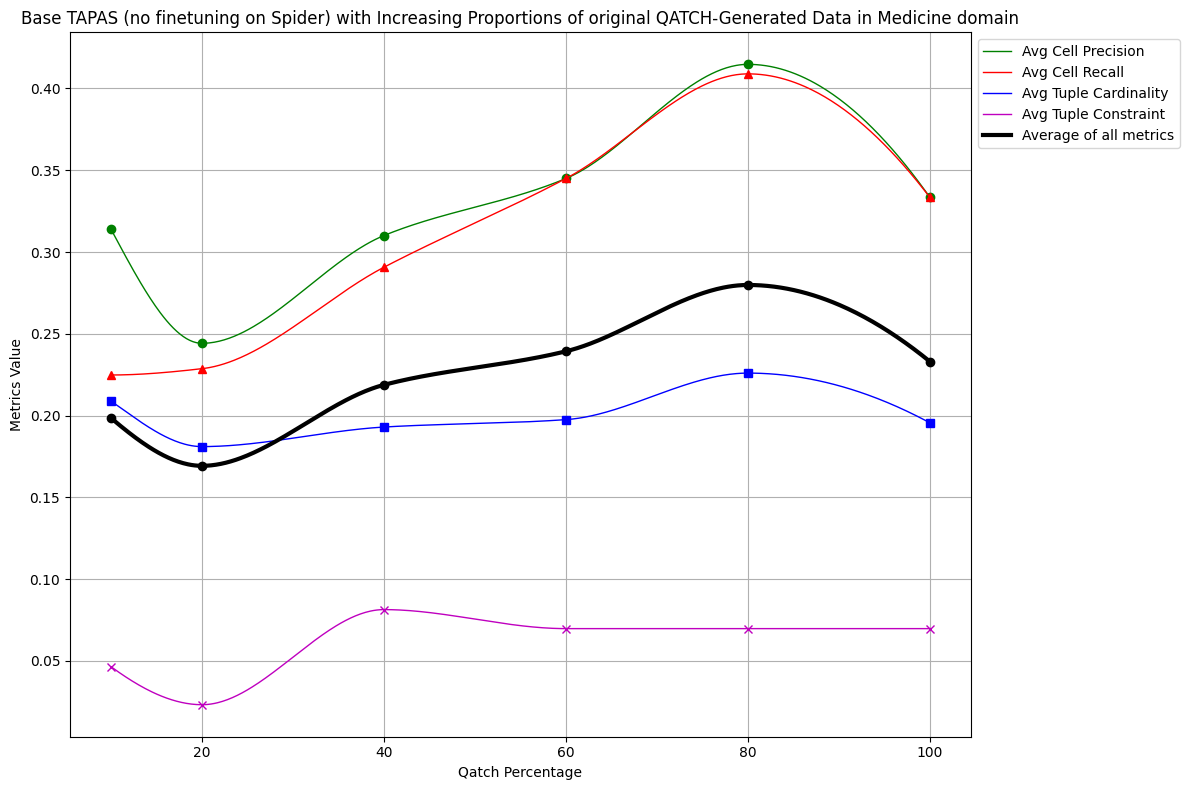

In [ ]:
#@title old expeirment, starting with base tapex instead of  spider fine tuned tapex
base_path = '/content/drive/MyDrive/TAPEX_Ressources/Results/'
filename_pattern = 'test_stats_df_medicine_{}prct.csv'
percentages = [10, 20,40, 60, 80, 100]

medicine_noSpiderFinetuning = pd.DataFrame()
first_file_structure = None
combined_df = pd.DataFrame()
first_file_structure = None

for pct in percentages:
    # if pct == 0:
    #     file_path = os.path.join(base_path, 'stats_model_spiderMineTest.csv')
    # else:
    file_path = os.path.join(base_path, filename_pattern.format(pct))
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    current_df = pd.read_csv(file_path)
    current_df['qatch_percentage'] = pct
    if first_file_structure is None:
        first_file_structure = current_df.columns.tolist()
    else:
        if current_df.columns.tolist() != first_file_structure:
            print(f"File structure mismatch, skipping file: {file_path}")
            continue
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)

medicine_noSpiderFinetuning=combined_df.copy()
columns_for_mean = ['general_avg_cell_precision', 'general_avg_cell_recall', 'general_avg_tuple_cardinality', 'general_avg_tuple_constraint']
medicine_noSpiderFinetuning['general_avg_mean'] = medicine_noSpiderFinetuning[columns_for_mean].mean(axis=1)



plt.figure(figsize=(12, 8))

# Ensure your data is sorted by 'qatch_percentage'
medicine_noSpiderFinetuning = medicine_noSpiderFinetuning.sort_values('qatch_percentage')
medicine_noSpiderFinetuning_Low_Lr=medicine_noSpiderFinetuning.copy()

# TEST data
x_smooth, y_smooth = smooth_curve(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_cell_precision'])
plt.plot(x_smooth, y_smooth, 'g-', label='Avg Cell Precision', lw=1)
plt.plot(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_cell_precision'], 'go')

x_smooth, y_smooth = smooth_curve(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_cell_recall'])
plt.plot(x_smooth, y_smooth, 'r-', label='Avg Cell Recall', lw=1)
plt.plot(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_cell_recall'], 'r^')

x_smooth, y_smooth = smooth_curve(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_tuple_cardinality'])
plt.plot(x_smooth, y_smooth, 'b-', label='Avg Tuple Cardinality', lw=1)
plt.plot(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_tuple_cardinality'], 'bs')

x_smooth, y_smooth = smooth_curve(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_tuple_constraint'])
plt.plot(x_smooth, y_smooth, 'm-', label='Avg Tuple Constraint', lw=1)
plt.plot(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_tuple_constraint'], 'mx')

# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'k-', label='Average of all metrics', lw=3)  # Increase line width for emphasis
plt.plot(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_mean'], 'ko')



plt.title('Base TAPAS (no finetuning on Spider) with Increasing Proportions of original QATCH-Generated Data in Medicine domain')
plt.xlabel('Qatch Percentage')
plt.ylabel('Metrics Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

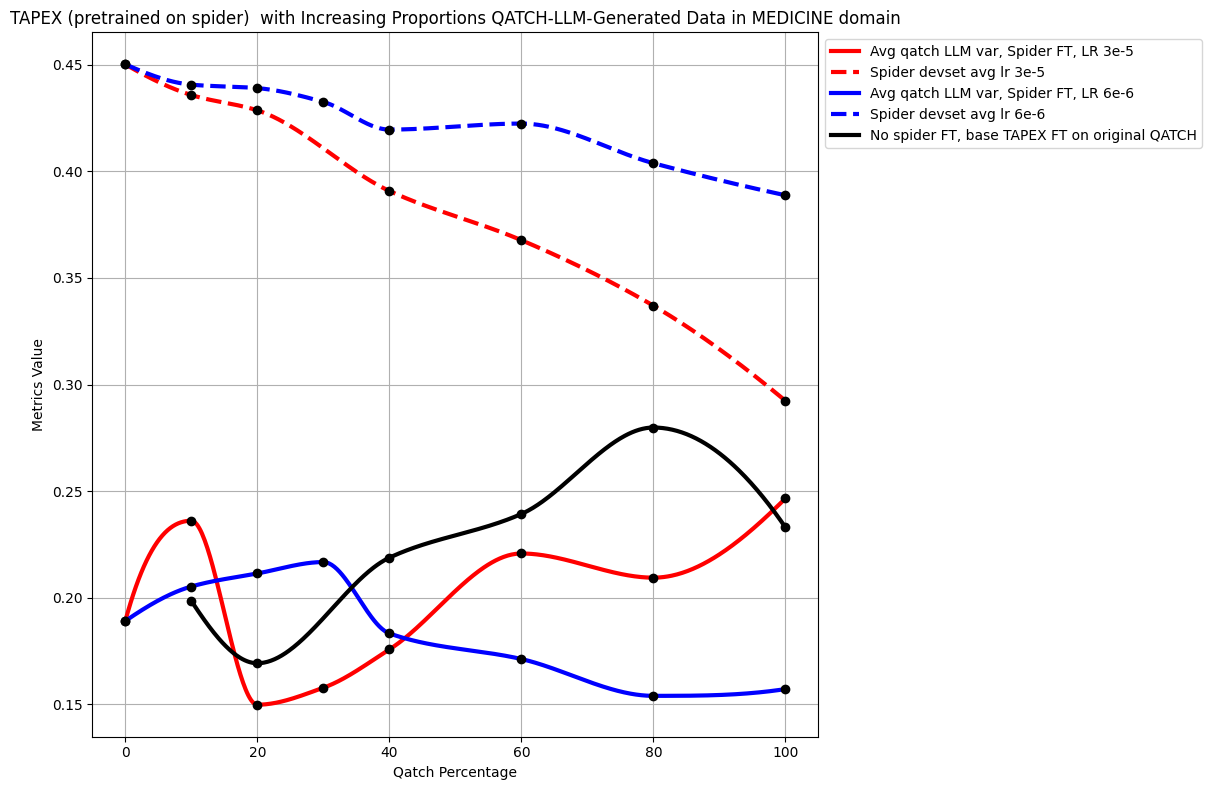

In [ ]:
#@title old expeirment, starting with base tapex instead of  spider fine tuned tapex



plt.figure(figsize=(12, 8))

# Ensure your data is sorted by 'qatch_percentage'
medicine_noSpiderFinetuning = medicine_noSpiderFinetuning.sort_values('qatch_percentage')

# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'r-', label='Avg qatch LLM var, Spider FT, LR 3e-5', lw=3)  # Increase line width for emphasis
plt.plot(medicine_llm_var_lowLR['qatch_percentage'], medicine_llm_var_lowLR['general_avg_mean'], 'ko')


# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'r--', label='Spider devset avg lr 3e-5', lw=3)  # Increase line width for emphasis
plt.plot(spiderDev_LLM_var_lowLR['qatch_percentage'], spiderDev_LLM_var_lowLR['general_avg_mean'], 'ko')

# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'b-', label='Avg qatch LLM var, Spider FT, LR 6e-6', lw=3)  # Increase line width for emphasis
plt.plot(medicine_llm_var_LowerLR['qatch_percentage'], medicine_llm_var_LowerLR['general_avg_mean'], 'ko')


# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'b--', label='Spider devset avg lr 6e-6', lw=3)  # Increase line width for emphasis
plt.plot(spiderDev_LLM_var_LowerLR['qatch_percentage'], spiderDev_LLM_var_LowerLR['general_avg_mean'], 'ko')

# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'k-', label='No spider FT, base TAPEX FT on original QATCH', lw=3)  # Increase line width for emphasis
plt.plot(medicine_noSpiderFinetuning['qatch_percentage'], medicine_noSpiderFinetuning['general_avg_mean'], 'ko')



plt.title('TAPEX (pretrained on spider)  with Increasing Proportions QATCH-LLM-Generated Data in MEDICINE domain')
plt.xlabel('Qatch Percentage')
plt.ylabel('Metrics Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

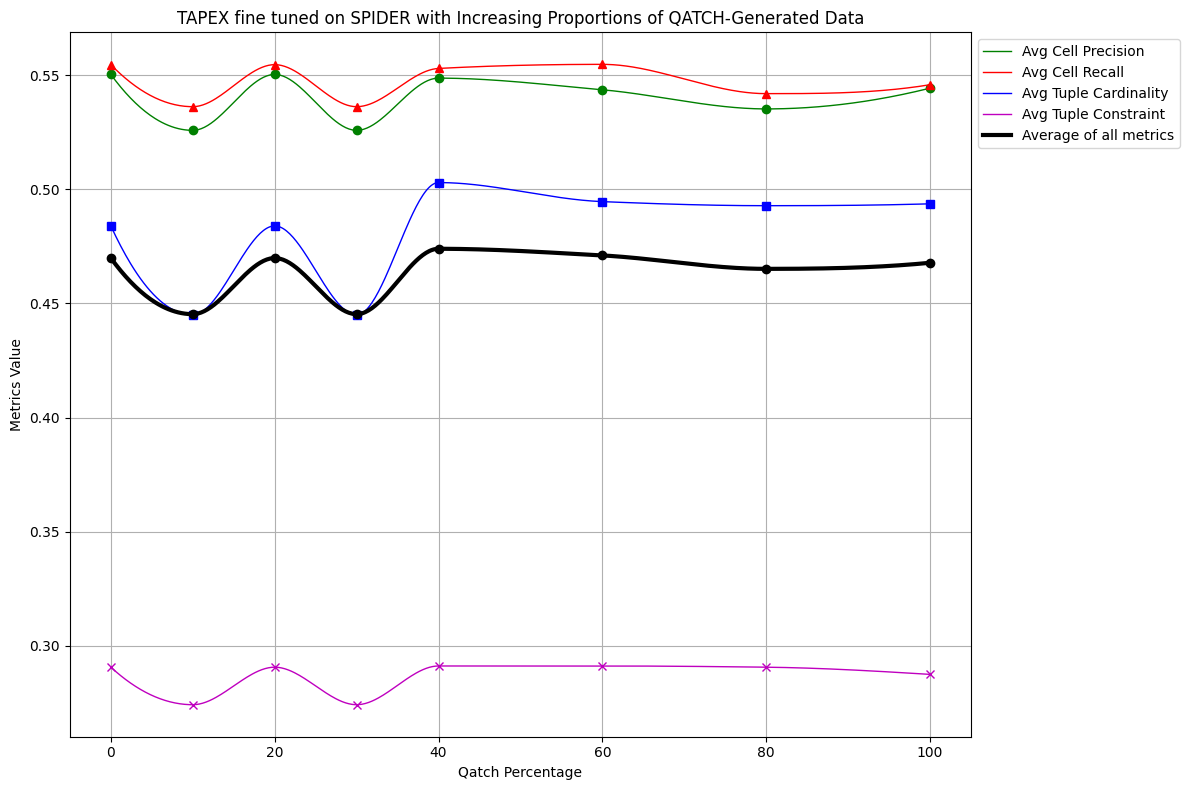

In [ ]:
#@title train_df_spider_{}prct_Metrics_June_Corrected
base_path = '/content/drive/MyDrive/TAPEX_Ressources/Results/'
filename_pattern = 'train_df_spider_{}prct_Metrics_June_Corrected.csv'
percentages = [0,10, 30,20,40, 60, 80, 100]

combined_df_MedicineQatch = pd.DataFrame()
first_file_structure = None
combined_df = pd.DataFrame()
first_file_structure = None

for pct in percentages:
    # if pct == 0:
    #     file_path = os.path.join(base_path, 'stats_model_spiderMineTest.csv')
    # else:
    file_path = os.path.join(base_path, filename_pattern.format(pct))
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    current_df = pd.read_csv(file_path)
    current_df['qatch_percentage'] = pct
    if first_file_structure is None:
        first_file_structure = current_df.columns.tolist()
    else:
        if current_df.columns.tolist() != first_file_structure:
            print(f"File structure mismatch, skipping file: {file_path}")
            continue
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)

combined_df_MedicineQatch=combined_df.copy()
columns_for_mean = ['general_avg_cell_precision', 'general_avg_cell_recall', 'general_avg_tuple_cardinality', 'general_avg_tuple_constraint']
combined_df_MedicineQatch['general_avg_mean'] = combined_df_MedicineQatch[columns_for_mean].mean(axis=1)



plt.figure(figsize=(12, 8))

# Ensure your data is sorted by 'qatch_percentage'
combined_df_MedicineQatch = combined_df_MedicineQatch.sort_values('qatch_percentage')
combined_df_MedicineQatch_Low_Lr=combined_df_MedicineQatch.copy()

# TEST data
x_smooth, y_smooth = smooth_curve(combined_df_MedicineQatch['qatch_percentage'], combined_df_MedicineQatch['general_avg_cell_precision'])
plt.plot(x_smooth, y_smooth, 'g-', label='Avg Cell Precision', lw=1)
plt.plot(combined_df_MedicineQatch['qatch_percentage'], combined_df_MedicineQatch['general_avg_cell_precision'], 'go')

x_smooth, y_smooth = smooth_curve(combined_df_MedicineQatch['qatch_percentage'], combined_df_MedicineQatch['general_avg_cell_recall'])
plt.plot(x_smooth, y_smooth, 'r-', label='Avg Cell Recall', lw=1)
plt.plot(combined_df_MedicineQatch['qatch_percentage'], combined_df_MedicineQatch['general_avg_cell_recall'], 'r^')

x_smooth, y_smooth = smooth_curve(combined_df_MedicineQatch['qatch_percentage'], combined_df_MedicineQatch['general_avg_tuple_cardinality'])
plt.plot(x_smooth, y_smooth, 'b-', label='Avg Tuple Cardinality', lw=1)
plt.plot(combined_df_MedicineQatch['qatch_percentage'], combined_df_MedicineQatch['general_avg_tuple_cardinality'], 'bs')

x_smooth, y_smooth = smooth_curve(combined_df_MedicineQatch['qatch_percentage'], combined_df_MedicineQatch['general_avg_tuple_constraint'])
plt.plot(x_smooth, y_smooth, 'm-', label='Avg Tuple Constraint', lw=1)
plt.plot(combined_df_MedicineQatch['qatch_percentage'], combined_df_MedicineQatch['general_avg_tuple_constraint'], 'mx')

# Plot the new column with more emphasis (e.g., thicker line)
x_smooth, y_smooth = smooth_curve(combined_df_MedicineQatch['qatch_percentage'], combined_df_MedicineQatch['general_avg_mean'])
plt.plot(x_smooth, y_smooth, 'k-', label='Average of all metrics', lw=3)  # Increase line width for emphasis
plt.plot(combined_df_MedicineQatch['qatch_percentage'], combined_df_MedicineQatch['general_avg_mean'], 'ko')



plt.title('TAPEX fine tuned on SPIDER with Increasing Proportions of QATCH-Generated Data')
plt.xlabel('Qatch Percentage')
plt.ylabel('Metrics Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

In [ ]:
import pandas as pd
import os

base_path = '/content/drive/MyDrive/TAPEX_Ressources/Results/'
filename_pattern = 'test_stats_df_medicine_{}prct.csv'
percentages = [10, 20,40, 60, 80, 100]

combined_df = pd.DataFrame()
first_file_structure = None

for pct in percentages:
    file_path = os.path.join(base_path, filename_pattern.format(pct))
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    current_df = pd.read_csv(file_path)
    current_df['qatch_percentage'] = pct
    if first_file_structure is None:
        first_file_structure = current_df.columns.tolist()
    else:
        if current_df.columns.tolist() != first_file_structure:
            print(f"File structure mismatch, skipping file: {file_path}")
            continue
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)


In [ ]:
base_path = '/content/drive/MyDrive/TAPEX_Ressources/Results/'
filename_pattern = 'valid_stats_df_medicine_{}prct.csv'
percentages = [10, 20,40, 60, 80, 100]

combined_df_valid = pd.DataFrame()
first_file_structure = None

for pct in percentages:
    file_path = os.path.join(base_path, filename_pattern.format(pct))
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    current_df = pd.read_csv(file_path)
    current_df['qatch_percentage'] = pct
    if first_file_structure is None:
        first_file_structure = current_df.columns.tolist()
    else:
        if current_df.columns.tolist() != first_file_structure:
            print(f"File structure mismatch, skipping file: {file_path}")
            continue
    combined_df_valid = pd.concat([combined_df_valid, current_df], ignore_index=True)


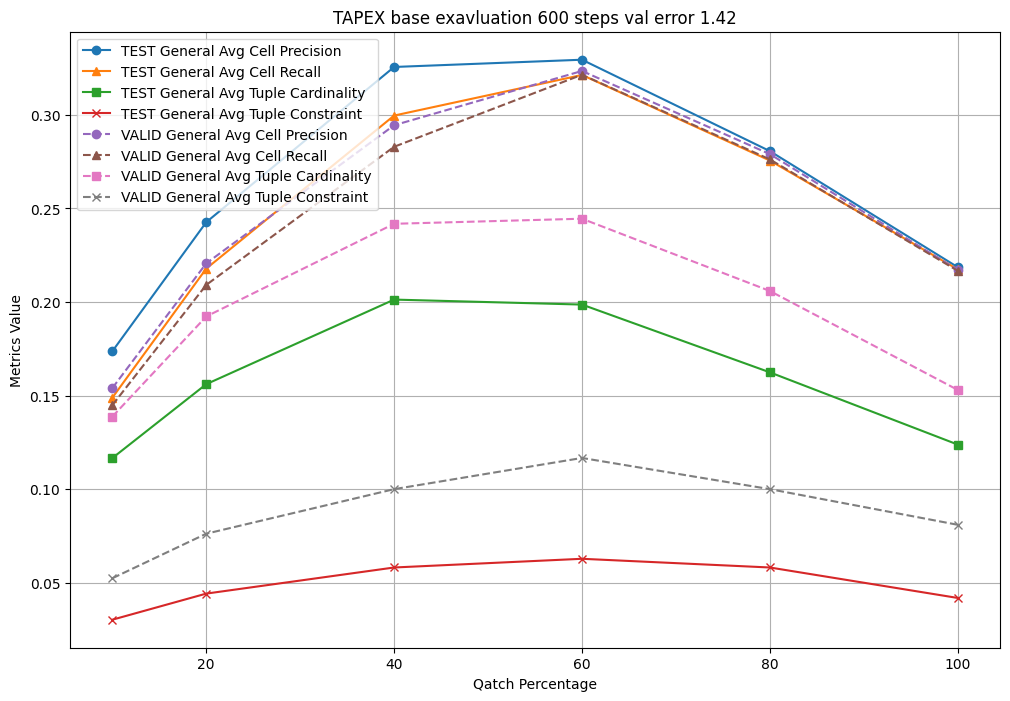

In [ ]:
# Define a small window for the moving average (larger window means more smoothing)
window = 5

plt.figure(figsize=(12, 8))

# TEST data
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df['general_avg_cell_precision'], np.ones(window)/window, mode='same'), label='TEST General Avg Cell Precision', marker='o')
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df['general_avg_cell_recall'], np.ones(window)/window, mode='same'), label='TEST General Avg Cell Recall', marker='^')
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df['general_avg_tuple_cardinality'], np.ones(window)/window, mode='same'), label='TEST General Avg Tuple Cardinality', marker='s')
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df['general_avg_tuple_constraint'], np.ones(window)/window, mode='same'), label='TEST General Avg Tuple Constraint', marker='x')

# VALIDATION data with dashed lines
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df_valid['general_avg_cell_precision'], np.ones(window)/window, mode='same'), label='VALID General Avg Cell Precision', marker='o', linestyle='--')
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df_valid['general_avg_cell_recall'], np.ones(window)/window, mode='same'), label='VALID General Avg Cell Recall', marker='^', linestyle='--')
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df_valid['general_avg_tuple_cardinality'], np.ones(window)/window, mode='same'), label='VALID General Avg Tuple Cardinality', marker='s', linestyle='--')
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df_valid['general_avg_tuple_constraint'], np.ones(window)/window, mode='same'), label='VALID General Avg Tuple Constraint', marker='x', linestyle='--')

plt.title('TAPEX base exavluation 600 steps val error 1.42')
plt.xlabel('Qatch Percentage')
plt.ylabel('Metrics Value')
plt.legend()

plt.grid(True)

plt.show()



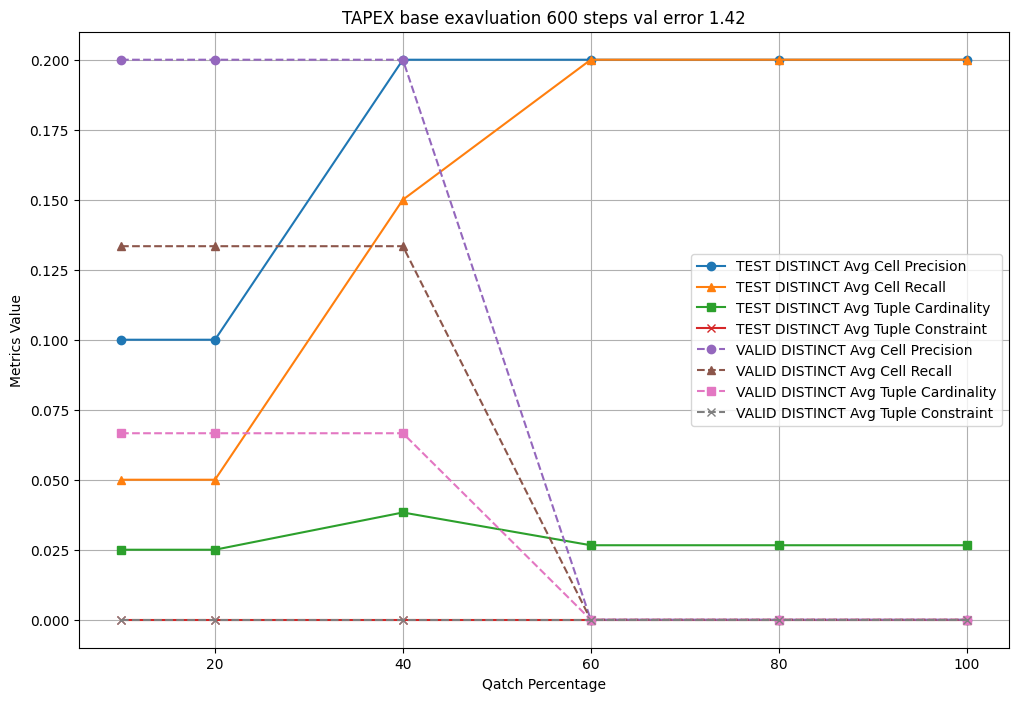

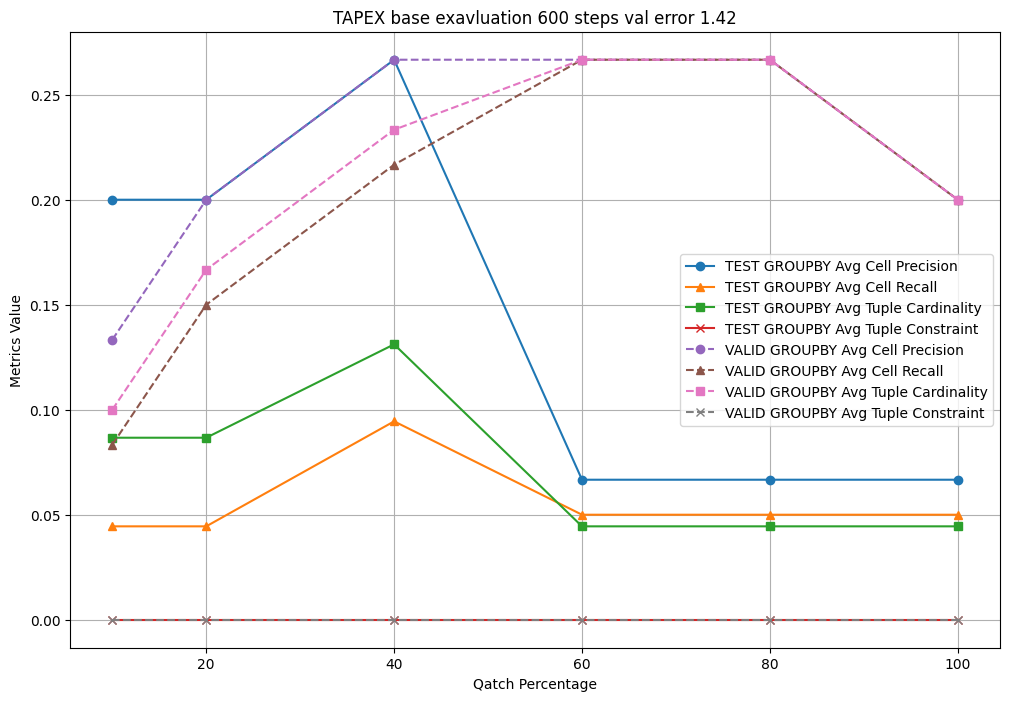

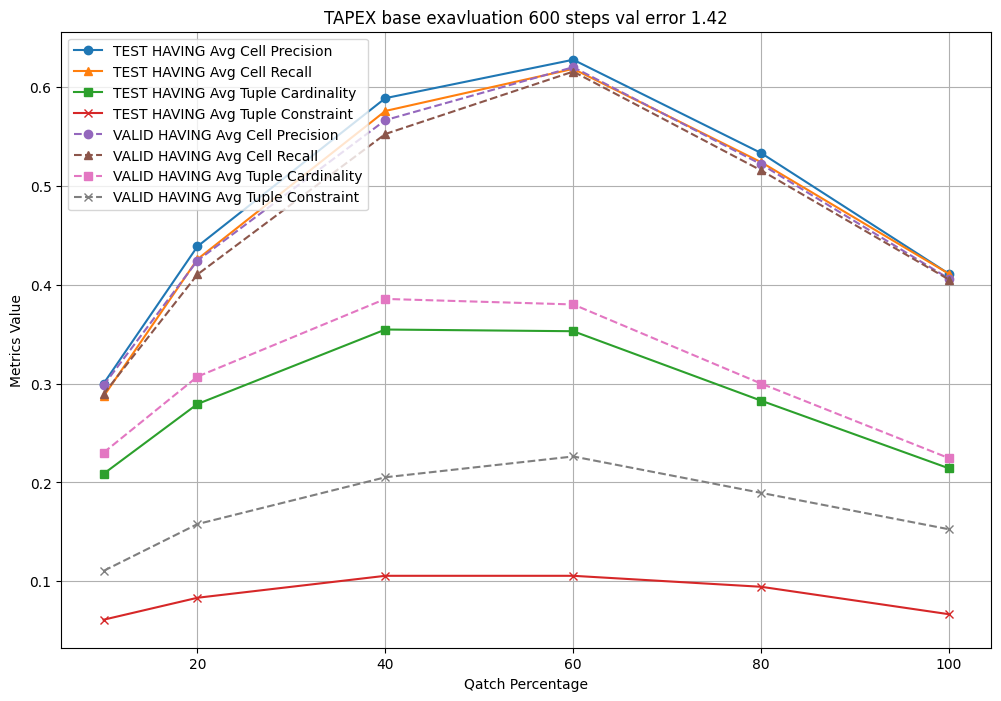

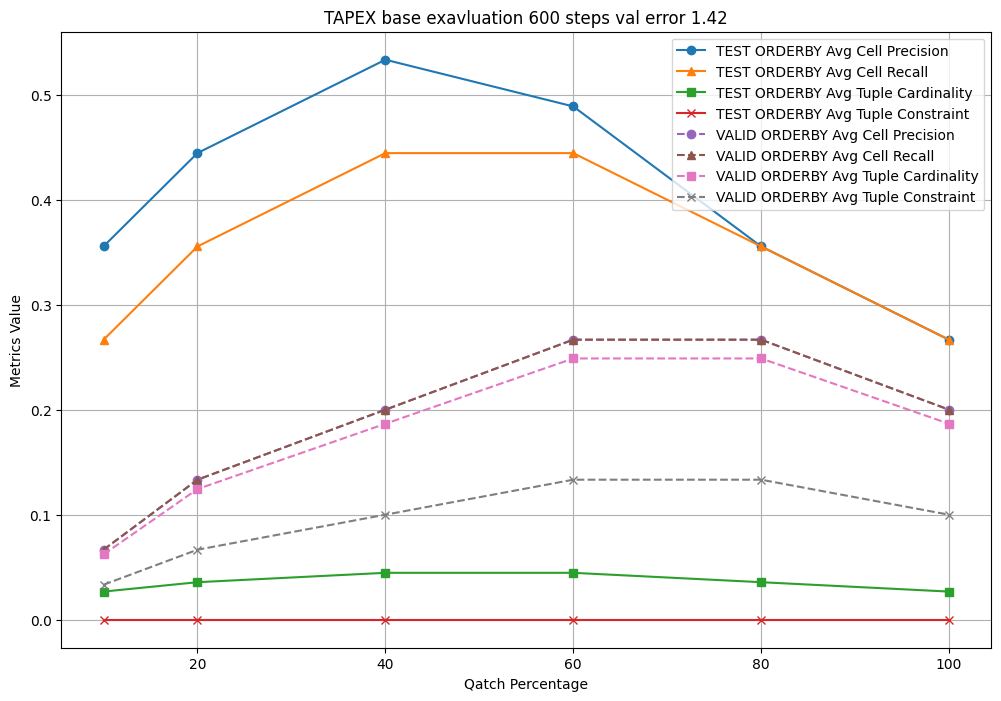

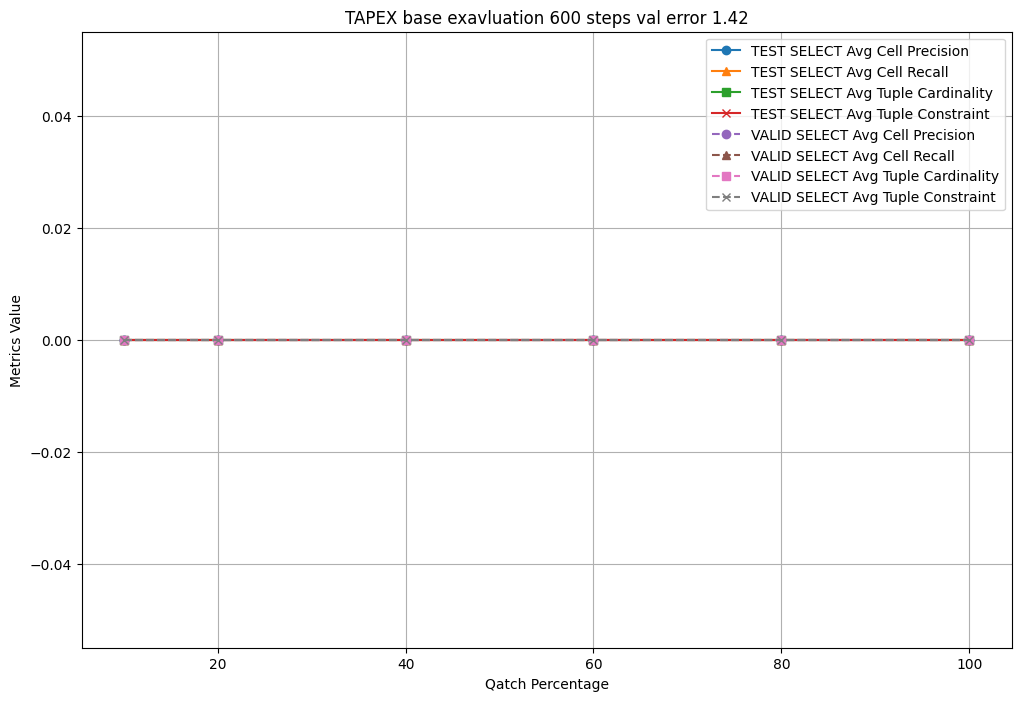

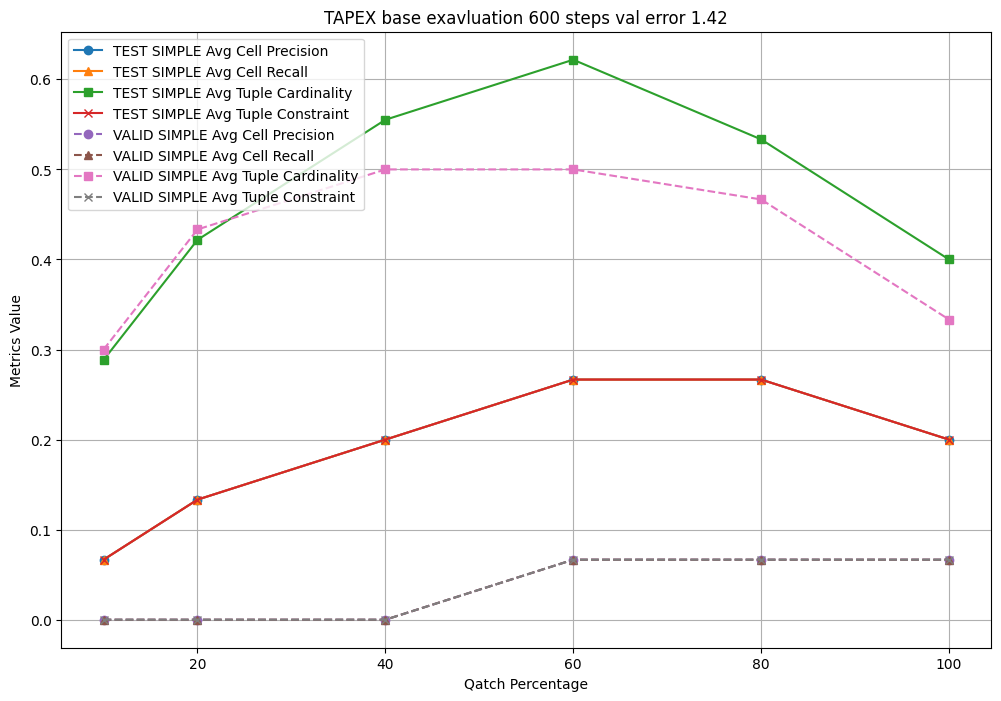

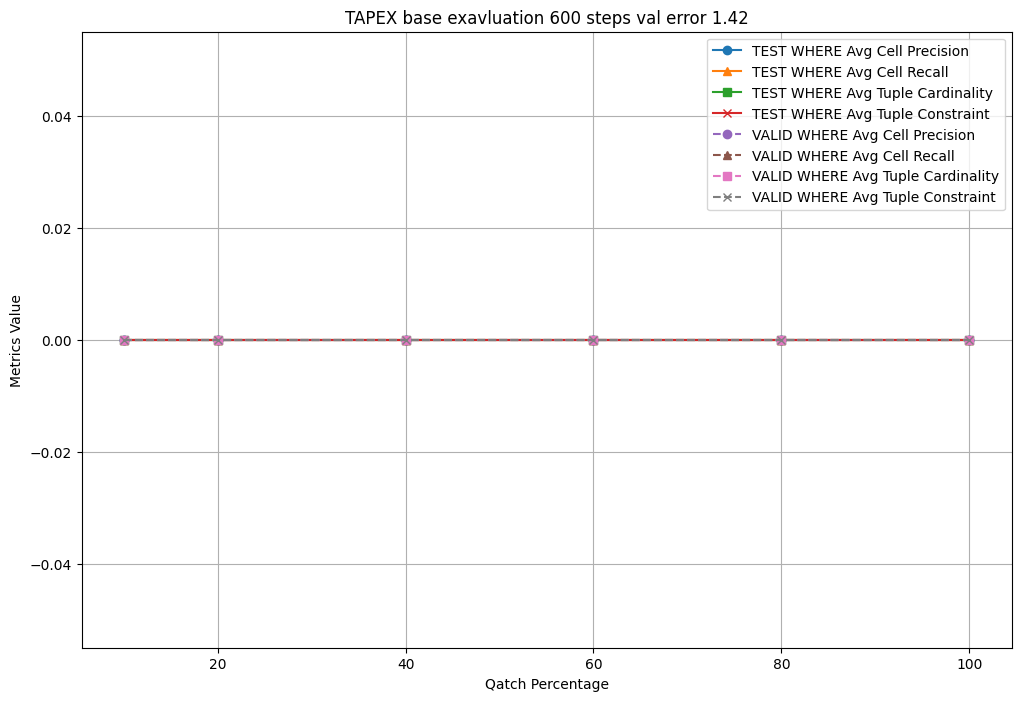

In [ ]:
# Define a small window for the moving average (larger window means more smoothing)
window = 5

categories = ['DISTINCT', 'GROUPBY', 'HAVING', 'ORDERBY', 'SELECT', 'SIMPLE', 'WHERE']


for category in categories:
    plt.figure(figsize=(12, 8))
    # TEST data
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df[f'{category}_cell_precision_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'TEST {category} Avg Cell Precision', marker='o')
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df[f'{category}_cell_recall_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'TEST {category} Avg Cell Recall', marker='^')
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df[f'{category}_tuple_cardinality_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'TEST {category} Avg Tuple Cardinality', marker='s')
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df[f'{category}_tuple_constraint_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'TEST {category} Avg Tuple Constraint', marker='x')

    # VALIDATION data with dashed lines
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df_valid[f'{category}_cell_precision_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'VALID {category} Avg Cell Precision', marker='o', linestyle='--')
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df_valid[f'{category}_cell_recall_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'VALID {category} Avg Cell Recall', marker='^', linestyle='--')
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df_valid[f'{category}_tuple_cardinality_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'VALID {category} Avg Tuple Cardinality', marker='s', linestyle='--')
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df_valid[f'{category}_tuple_constraint_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'VALID {category} Avg Tuple Constraint', marker='x', linestyle='--')

    plt.title('TAPEX base exavluation 600 steps val error 1.42')
    plt.xlabel('Qatch Percentage')
    plt.ylabel('Metrics Value')
    plt.legend()

    plt.grid(True)

    plt.show()


### SpiderDev performance evolution

In [ ]:
base_path = '/content/drive/MyDrive/TAPEX_Ressources/Results/'
filename_pattern = 'tapex_spiderDev_{}prct_Qatch_medicine.csv'
percentages = [0,10, 20,40, 60, 80, 100]

combined_df = pd.DataFrame()
first_file_structure = None

for pct in percentages:
    file_path = os.path.join(base_path, filename_pattern.format(pct))
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    current_df = pd.read_csv(file_path)
    current_df['qatch_percentage'] = pct
    if first_file_structure is None:
        first_file_structure = current_df.columns.tolist()
    else:
        if current_df.columns.tolist() != first_file_structure:
            print(f"File structure mismatch, skipping file: {file_path}")
            continue
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)

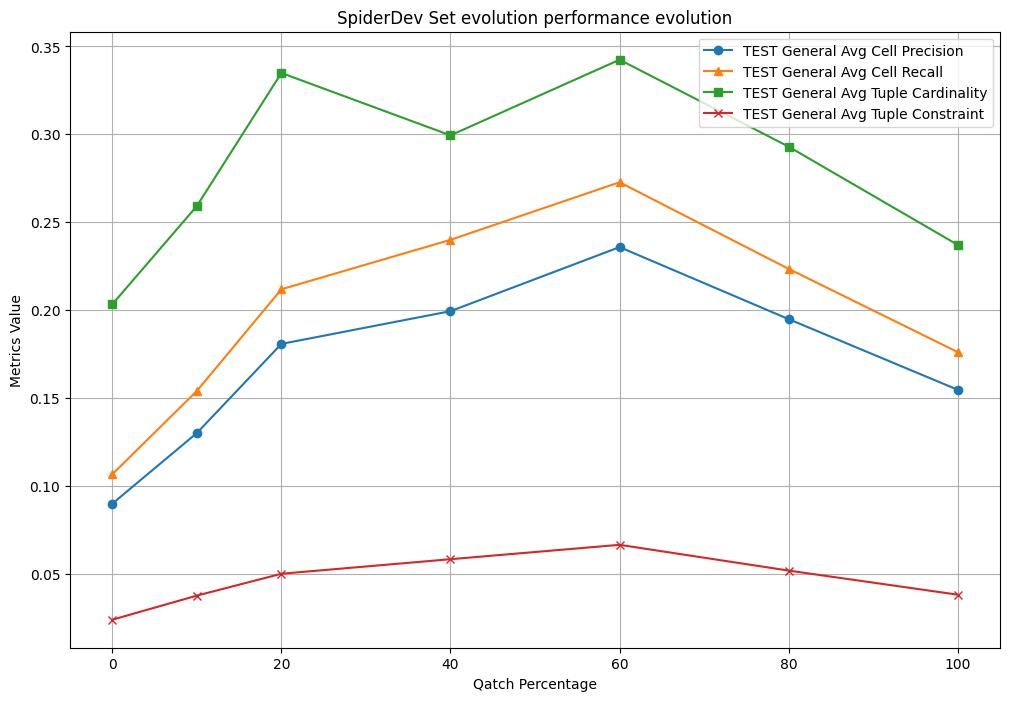

In [ ]:
# Define a small window for the moving average (larger window means more smoothing)
window = 5

plt.figure(figsize=(12, 8))

# TEST data
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df['general_avg_cell_precision'], np.ones(window)/window, mode='same'), label='TEST General Avg Cell Precision', marker='o')
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df['general_avg_cell_recall'], np.ones(window)/window, mode='same'), label='TEST General Avg Cell Recall', marker='^')
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df['general_avg_tuple_cardinality'], np.ones(window)/window, mode='same'), label='TEST General Avg Tuple Cardinality', marker='s')
plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df['general_avg_tuple_constraint'], np.ones(window)/window, mode='same'), label='TEST General Avg Tuple Constraint', marker='x')


plt.title('SpiderDev Set evolution performance evolution')
plt.xlabel('Qatch Percentage')
plt.ylabel('Metrics Value')
plt.legend()

plt.grid(True)

plt.show()



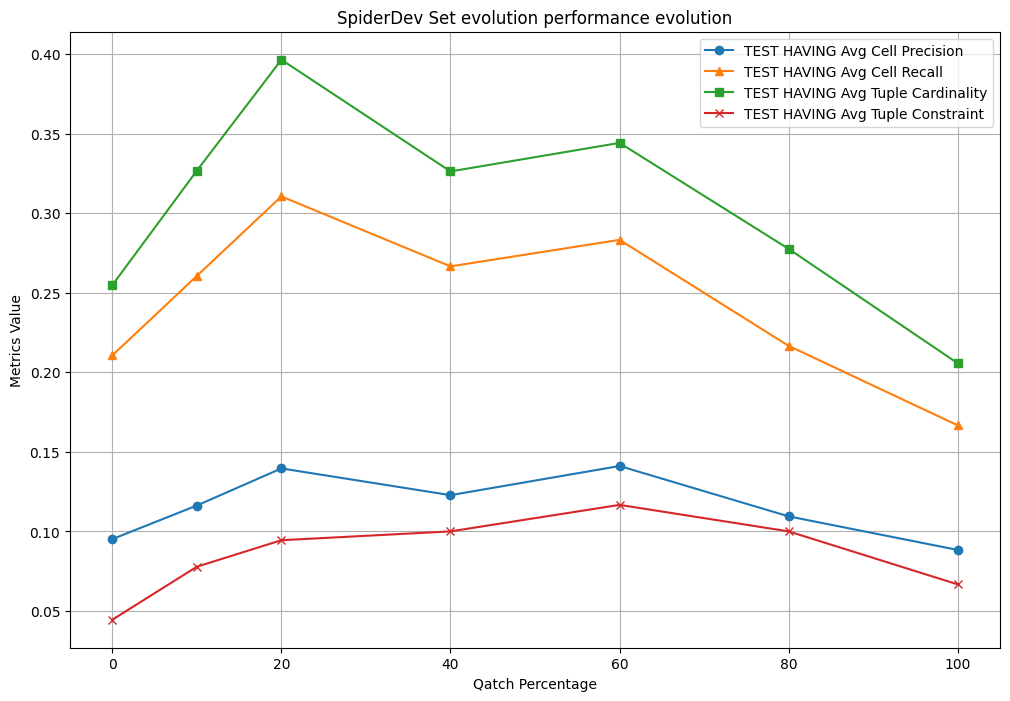

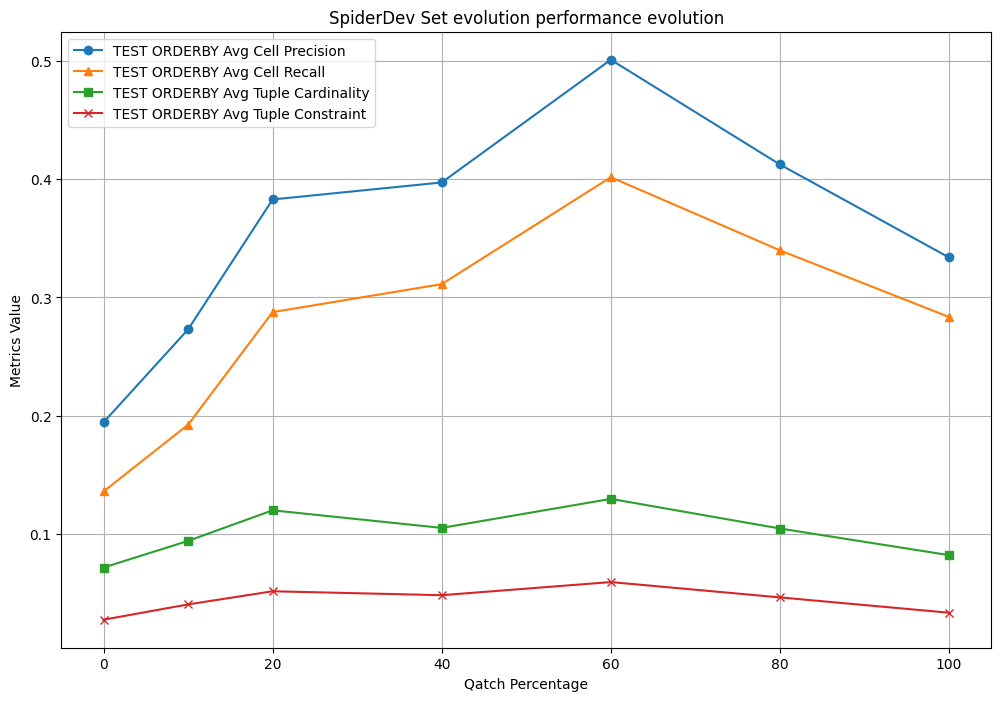

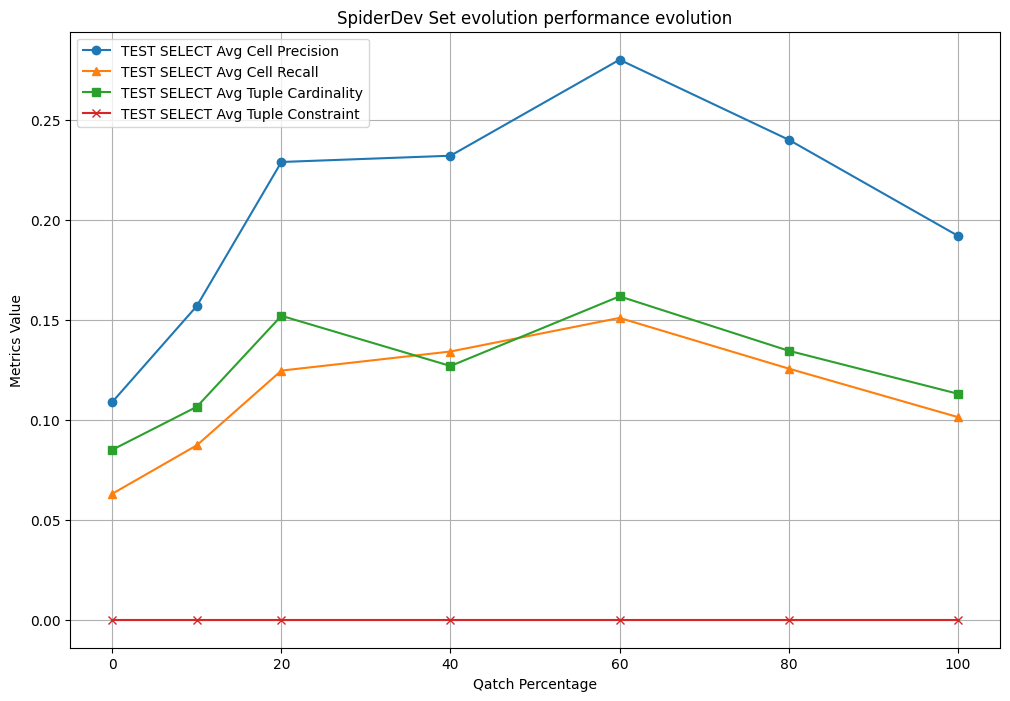

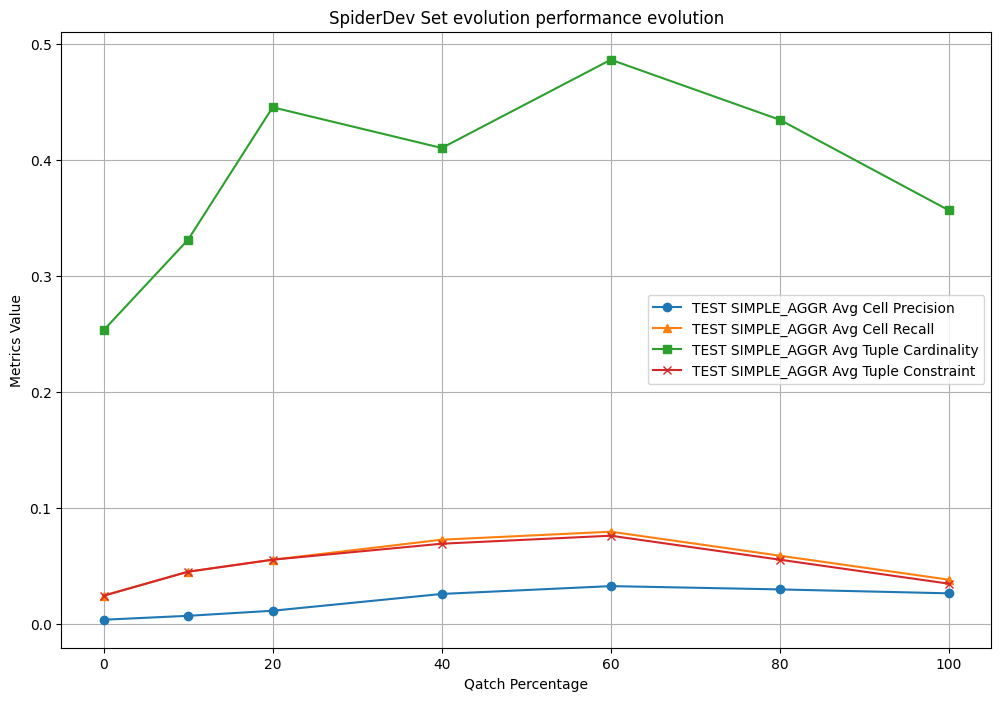

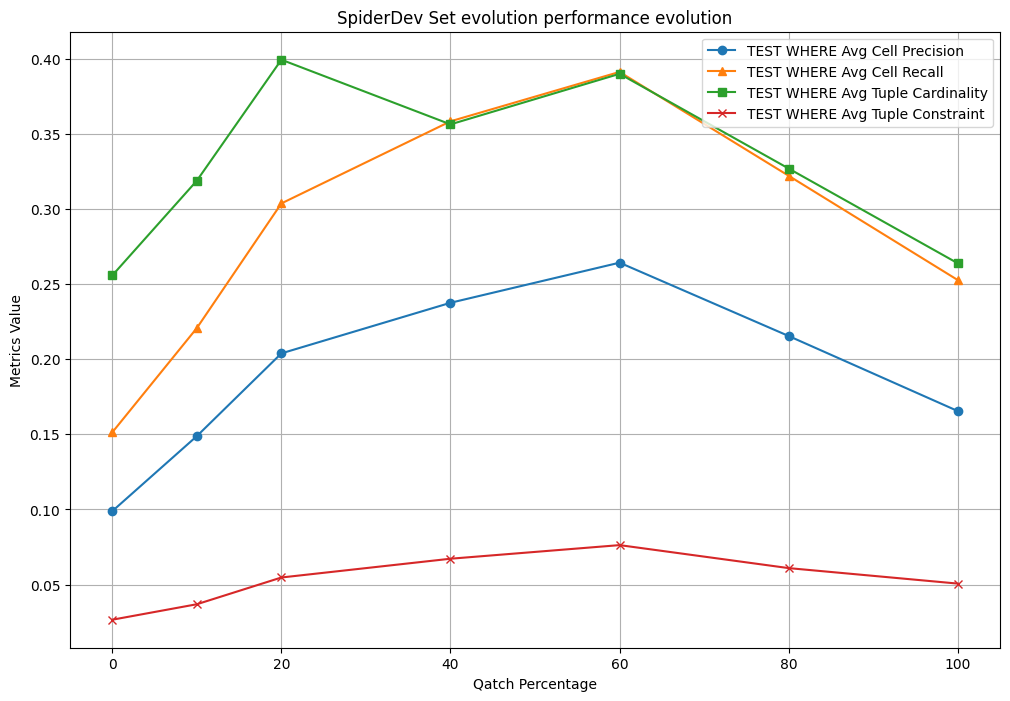

In [ ]:
# Define a small window for the moving average (larger window means more smoothing)
window = 5

categories = ['HAVING', 'ORDERBY', 'SELECT', 'SIMPLE_AGGR', 'WHERE']


for category in categories:
    plt.figure(figsize=(12, 8))
    # TEST data
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df[f'{category}_cell_precision_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'TEST {category} Avg Cell Precision', marker='o')
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df[f'{category}_cell_recall_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'TEST {category} Avg Cell Recall', marker='^')
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df[f'{category}_tuple_cardinality_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'TEST {category} Avg Tuple Cardinality', marker='s')
    plt.plot(combined_df['qatch_percentage'], np.convolve(combined_df[f'{category}_tuple_constraint_predictions_TAPAS'], np.ones(window)/window, mode='same'), label=f'TEST {category} Avg Tuple Constraint', marker='x')



    plt.title('SpiderDev Set evolution performance evolution')
    plt.xlabel('Qatch Percentage')
    plt.ylabel('Metrics Value')
    plt.legend()

    plt.grid(True)

    plt.show()
